In [38]:
### Data Loading from CSV
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [85]:
# Reading historical data from CSV
df = pd.read_csv('C:\\Users\\arind\\OneDrive\\Desktop\\RELIANCE1.csv', parse_dates=['Date'])
df = df[['Date', 'Close']]
df.columns = ['Date', 'Close']
print(df['Date'])

0      2018-07-13
1      2018-07-16
2      2018-07-17
3      2018-07-18
4      2018-07-19
          ...    
1228   2023-07-06
1229   2023-07-07
1230   2023-07-10
1231   2023-07-11
1232   2023-07-12
Name: Date, Length: 1233, dtype: datetime64[ns]


In [86]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
df[['Close']] = scaler.fit_transform(df[['Close']])

# Splitting the dataset into train and test sets
training_size = int(len(df) * 0.65)
test_size = len(df) - training_size
train_data, test_data = df.iloc[0:training_size], df.iloc[training_size:len(df)]

In [87]:
# Function to create supervised dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset['Close'].values[i:(i + time_step)]
        dataX.append(a)
        dataY.append(dataset['Close'].values[i + time_step])
    return np.array(dataX), np.array(dataY)

In [96]:
# Reshaping input data for LSTM
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [97]:
# Reshaping input to be [samples, time steps, features] required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [98]:
# Creating the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [99]:
# Training the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 16s 258ms/step - loss: 0.1283 - val_loss: 0.1767
Epoch 2/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0265 - val_loss: 0.0472
Epoch 3/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 4/100
13/13 [==============================] - 0s 28ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 5/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0016 - val_loss: 0.0070
Epoch 6/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0013 - val_loss: 0.0087
Epoch 7/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 8/100
13/13 [==============================] - 0s 30ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 9/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 10/100
13/13 [==============================] - 0s 29ms/step - loss: 0.0011 - val_loss: 0.00

In [100]:
# Predicting on training and testing data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

14/14 [==============================] - 0s 5ms/step


In [101]:
# Inverse transforming predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [102]:
# Calculating RMSE performance metrics
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

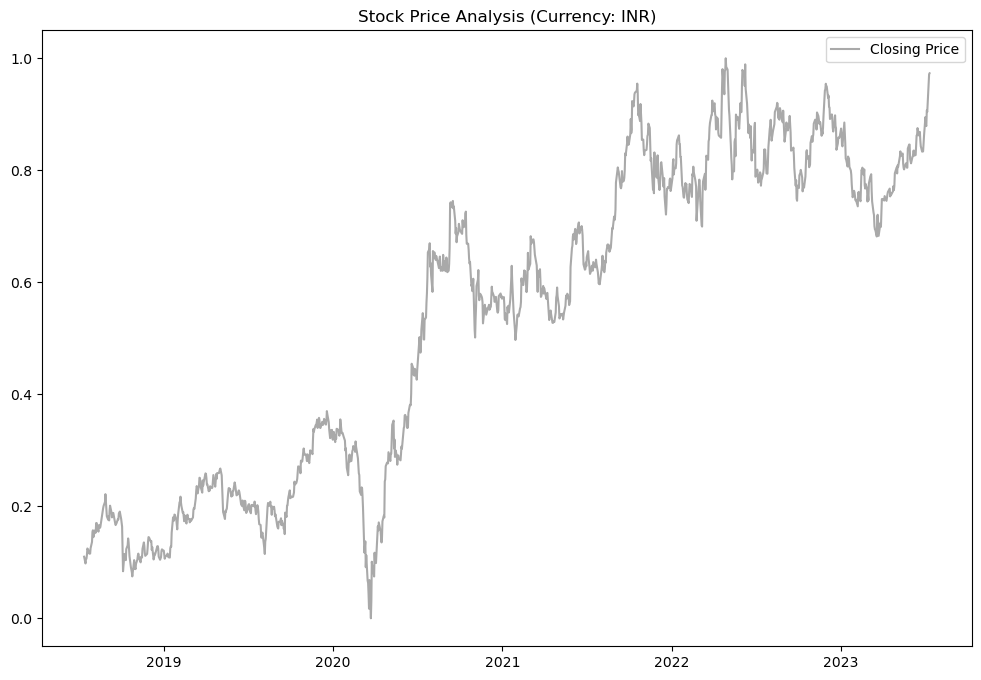

In [103]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.title('Stock Price Analysis (Currency: INR)')
plt.plot(df['Date'], df['Close'], color='blue', label='Closing Price')
plt.legend()
plt.show()